In [ ]:
#importing all necessary modules

import cv2
import matplotlib.pyplot as plt    

from utils import *
from darknet import Darknet

In [ ]:
# defining path and name of the cfg file which contains descreption of model
cfg_file = 'yolov3.cfg'

# Set path and name of the pre-trained weights file
weight_file = 'yolov3.weights'

# Set the location and name of the COCO object classes file
names = 'coco.names'

In [ ]:
# Load the network architecture
model = Darknet(cfg_file)

# Load the pre-trained weights
model.load_weights(weight_file)

# Load the COCO object classes
class_names = load_class_names(names)

In [ ]:
model.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256
   13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128
   14 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256
   15 shortcut 12
   16 conv    128  1 x 1

In [ ]:
nms_thresh = 0.6    # Set the NMS threshold

iou_thresh = 0.4     # Set the IOU threshold


In [ ]:
# method  for preprocessesing the images 
def preprocess(img, visualization=False):
    
    # Set the custom figure size
    plt.rcParams['figure.figsize'] = [24.0, 14.0]
    
    # Resize the image to the input width and height of the first layer of the network.    
    resized_image = cv2.resize(img, (model.width, model.height))
    
    if(visualization):
        plt.subplot(121)
        plt.title('Original Image')
        plt.imshow(img)
        plt.subplot(122)
        plt.title('Resized Image')
        plt.imshow(resized_image)
        plt.show()
    
    return resized_image
    



It took 3.355 seconds to detect the objects in the image.

Number of Objects Detected: 20 

Objects Found and Confidence Level:

1. car: 0.978963
2. bus: 0.997843
3. bus: 0.995832
4. bus: 0.935683
5. bus: 0.985153
6. motorbike: 0.999238
7. car: 0.993113
8. person: 0.999999
9. bus: 0.503130
10. car: 0.993314
11. motorbike: 0.999837
12. bicycle: 0.721835
13. car: 0.538457
14. bus: 0.588377
15. bus: 0.762500
16. motorbike: 0.495220
17. person: 0.997346
18. person: 1.000000
19. bus: 0.534770
20. person: 0.986664


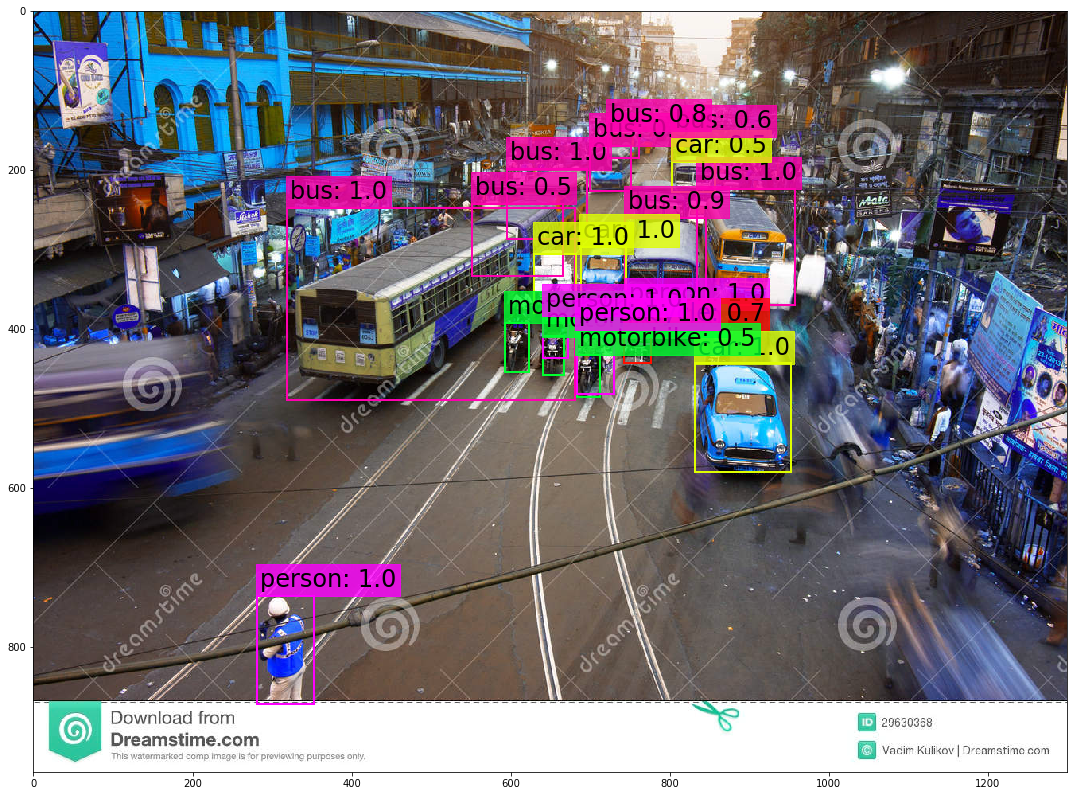

In [ ]:
# Load a  test image
img = cv2.imread('Images/people-cars-blurred-motion-busy-street-29630368.jpg');


# Resize the image to the input width and height of the first layer of the network.    
resized_image = preprocess(img)

# Detect objects in the image
boxes = detect_objects(model, resized_image, iou_thresh, nms_thresh)

# Print the objects found and the confidence level
print_objects(boxes, class_names)

#Plot the image with bounding boxes and corresponding object class labels
plot_boxes(img, boxes, class_names, plot_labels = True)

In [ ]:
# gathering information about boxes
print(type(boxes))
print(len(boxes))
print(len(boxes[0]))

<class 'list'>
20
7


In [ ]:
# boxes is a list of lists 
# Here in this example image 
# dimension of boxes is 16x7 which means
# 16 objects detected with confidence greater than threshold provided
# each object in the list has 7 things which contains
# boxes[0][5] = confidence for 1st(0) object
# boxes[0][6] = class_id  i.e to get detected object name we can use class_name[boxes[0][6]]
# we dont need others right now as we only need to find if objects belongs to vehicle types and count them

In [ ]:
#making list of vehicles as we only need to count no of vehicles
list_of_vehicles = ["car","bus","motorbike","truck","bicycle"]

In [ ]:
def get_vehicle_count(boxes, class_names):
  total_vehicle_count=0 # total vechiles present in the image
  dict_vehicle_count = {} # dictionary with count of each distinct vehicles detected
  
  # examine each detected bounding boxes 
  for i in range(len(boxes)): 
    box = boxes[i] 
    if (len(box) >=7 and class_names): # validation
      class_id = box[6]
      class_name = class_names[class_id]
      if( class_name in list_of_vehicles):
        total_vehicle_count += 1
        dict_vehicle_count[class_name] = dict_vehicle_count.get(class_name,0) + 1
  
  return total_vehicle_count, dict_vehicle_count
  

In [ ]:
total_vehicles, each_vehicle = get_vehicle_count(boxes, class_names)
print("Total vehicles in image", total_vehicles)
print("Each vehicles count in image", each_vehicle)


Total vehicles in image 16
Each vehicles count in image {'car': 4, 'bus': 8, 'motorbike': 3, 'bicycle': 1}


In [ ]:
def detect_vehicles(img, visualization=False):
    #pre-processing the input 
    resized_image = preprocess(img) 
    boxes = detect_objects(model, resized_image, iou_thresh, nms_thresh)
    
     # making visualization of image with bounding box optional as it makes program slower
    if(visualization):
        plt.rcParams['figure.figsize'] = [24.0, 14.0]
        plot_boxes(img, boxes, class_names, plot_labels = True)
    return get_vehicle_count(boxes,class_names)
 
    

In [ ]:
## test without visualization
my_new_img = cv2.imread('Images/people-cars-blurred-motion-busy-street-29630368.jpg');

total_vehicles, each_vehicle = detect_vehicles(my_new_img)
print("Total vehicles in image", total_vehicles)
print("Each vehicles count in image", each_vehicle)



It took 3.440 seconds to detect the objects in the image.

Number of Objects Detected: 20 

Total vehicles in image 16
Each vehicles count in image {'car': 4, 'bus': 8, 'motorbike': 3, 'bicycle': 1}




It took 3.359 seconds to detect the objects in the image.

Number of Objects Detected: 20 



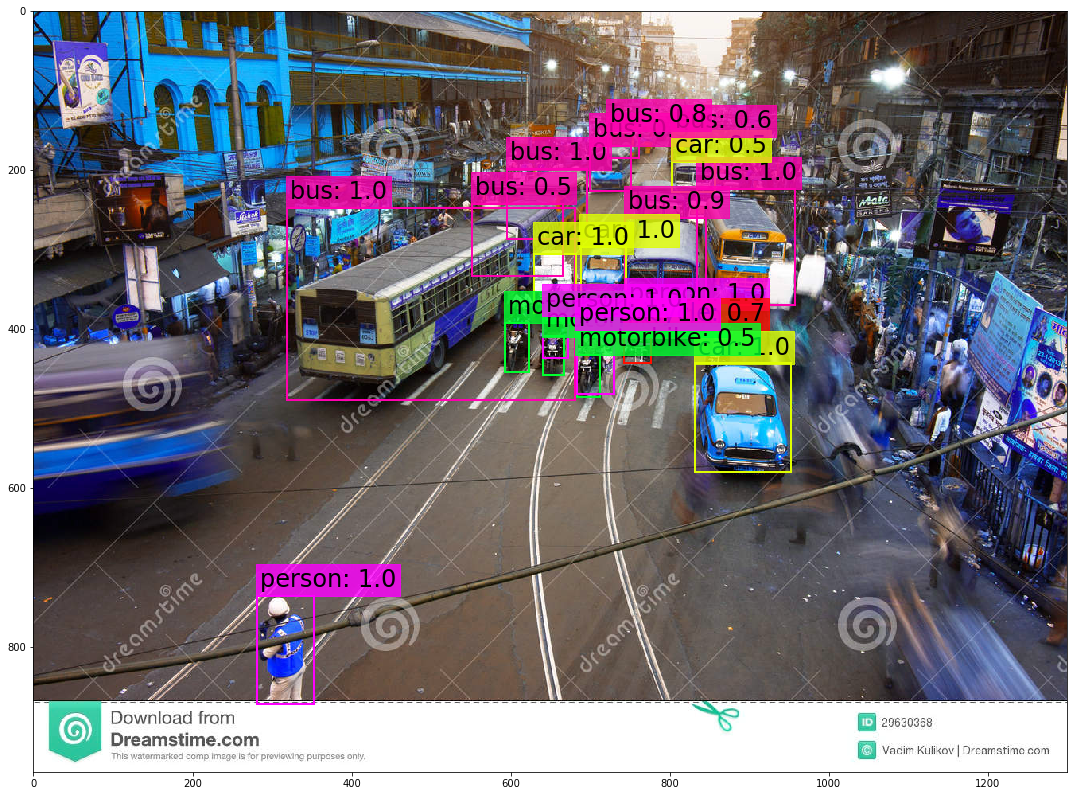

Total vehicles in image 16
Each vehicles count in image {'car': 4, 'bus': 8, 'motorbike': 3, 'bicycle': 1}


In [ ]:
## Test with visualization 
my_new_img = cv2.imread('Images/people-cars-blurred-motion-busy-street-29630368.jpg');

total_vehicles, each_vehicle = detect_vehicles(my_new_img,visualization=True)
print("Total vehicles in image", total_vehicles)
print("Each vehicles count in image", each_vehicle)

In [ ]:
from serial import Serial

# set correct portname 

arduino = Serial("COM3",9600)

# sending data to arduino 
arduino.write(14)


SerialException: could not open port 'COM3': PermissionError(13, 'Access is denied.', None, 5)